<a href="https://colab.research.google.com/github/Anson1013/HW/blob/main/CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow 的第一步

#### 常數張量和變量

**全一或全零張量**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**隨機張量**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.56136733]
 [ 0.32986325]
 [-1.1353432 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.2078613 ]
 [0.77824163]
 [0.64400184]], shape=(3, 1), dtype=float32)


**NumPy 數組是可分配的**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**創建 TensorFlow 變量**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.894148  ],
       [ 0.14885515],
       [-0.07686603]], dtype=float32)>


**為 TensorFlow 變量賦值**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**為 TensorFlow 變量的子集賦值**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 張量運算：在 TensorFlow 中做數學運算



**一些基本的數學運算**

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### 再看 GradientTape API

**用 `GradientTape`**

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**使用帶有恆定張量輸入的“GradientTape”**

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**使用嵌套梯度帶計算二階梯度**

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### 端到端示例：純 TensorFlow 中的線性分類器

**在二維平面中生成兩類隨機點**

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**將兩個類堆疊成一個形狀為 (2000, 2) 的數組**

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**生成對應的目標（0和1）**

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**繪製兩個點類**

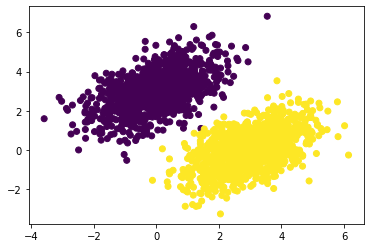

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**創建線性分類器變量**

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**前向傳遞函數**

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**均方誤差損失函數**

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**訓練步驟函數**

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**批量訓練循環**

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.0710
Loss at step 1: 0.6582
Loss at step 2: 0.2114
Loss at step 3: 0.1514
Loss at step 4: 0.1351
Loss at step 5: 0.1245
Loss at step 6: 0.1154
Loss at step 7: 0.1071
Loss at step 8: 0.0996
Loss at step 9: 0.0928
Loss at step 10: 0.0866
Loss at step 11: 0.0810
Loss at step 12: 0.0758
Loss at step 13: 0.0712
Loss at step 14: 0.0669
Loss at step 15: 0.0631
Loss at step 16: 0.0596
Loss at step 17: 0.0564
Loss at step 18: 0.0535
Loss at step 19: 0.0509
Loss at step 20: 0.0485
Loss at step 21: 0.0463
Loss at step 22: 0.0443
Loss at step 23: 0.0425
Loss at step 24: 0.0409
Loss at step 25: 0.0394
Loss at step 26: 0.0380
Loss at step 27: 0.0368
Loss at step 28: 0.0357
Loss at step 29: 0.0347
Loss at step 30: 0.0337
Loss at step 31: 0.0329
Loss at step 32: 0.0321
Loss at step 33: 0.0314
Loss at step 34: 0.0308
Loss at step 35: 0.0302
Loss at step 36: 0.0297
Loss at step 37: 0.0292
Loss at step 38: 0.0288
Loss at step 39: 0.0284


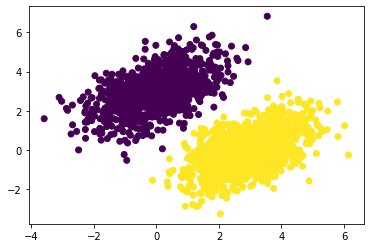

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

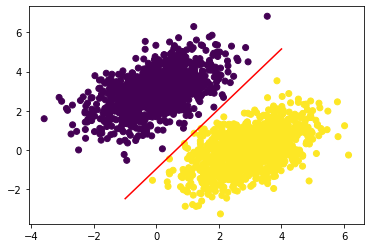

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## 神經網絡剖析：了解核心 Keras API

### 層：深度學習的基石

#### Keras 中的基礎層類

**一個作為“層”子類實現的“密集”層**

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### 自動形狀推斷：動態構建圖層


In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### 從圖層到模型

### “編譯”步驟：配置學習過程

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### 選擇損失函數

### 理解 fit() 方法

**使用 NumPy 數據調用 `fit()`**

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 6.3325 - binary_accuracy: 0.8965
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 6.0709 - binary_accuracy: 0.8960
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 5.8489 - binary_accuracy: 0.8950
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 5.6365 - binary_accuracy: 0.8970
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 5.4298 - binary_accuracy: 0.8970


In [33]:
history.history

{'loss': [6.33247184753418,
  6.070865631103516,
  5.848946571350098,
  5.636476993560791,
  5.429812908172607],
 'binary_accuracy': [0.8964999914169312,
  0.8960000276565552,
  0.8949999809265137,
  0.8970000147819519,
  0.8970000147819519]}

### 監控驗證數據的損失和指標

**使用 `validation_data` 參數**

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 9ms/step - loss: 0.4591 - binary_accuracy: 0.8407 - val_loss: 0.3136 - val_binary_accuracy: 0.8067
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0727 - binary_accuracy: 0.9557 - val_loss: 0.0398 - val_binary_accuracy: 0.9950
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0674 - binary_accuracy: 0.9614 - val_loss: 0.0410 - val_binary_accuracy: 0.9967
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0717 - binary_accuracy: 0.9614 - val_loss: 0.0372 - val_binary_accuracy: 0.9967
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0669 - binary_accuracy: 0.9614 - val_loss: 0.0904 - val_binary_accuracy: 0.9450


### 推理：訓練後使用模型

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[ 0.8965862 ]
 [ 0.6822897 ]
 [ 0.5245501 ]
 [-0.14330727]
 [ 0.6769681 ]
 [ 0.7302239 ]
 [-0.1337009 ]
 [ 0.54288554]
 [ 0.7757228 ]
 [-0.06829339]]
